This code is a comprehensive set of functions and scripts for performing various image processing and computer vision tasks, particularly focused on traffic sign recognition. 

Let's break down the code into sections and provide a brief explanation of each part.

### 1. Importing Libraries and Setting Directories
```python
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
```
- This section imports necessary libraries for image processing, file system operations, data manipulation, and visualization.

### 2. Defining Directory and File Operations
```python
dir = "/kaggle/input/traffic/myData"
extracted_files = os.listdir(dir)
```
- Sets the directory path where the image data is stored and lists all files in that directory.

### 3. Displaying Sample Images
```python
def display_sample_images(base_path, sample_files, num_samples=4):
    ...
```
- Function to display a few sample images from the dataset.

### 4. Displaying Sample Images Using OpenCV
```python
def display_sample_images_cv(base_path, num_samples=4):
    ...
```
- Similar to the previous function but displays images using OpenCV instead of Matplotlib.

### 5. Displaying Image Histograms
```python
def display_image_histograms(base_path, num_samples=2):
    ...
```
- Displays histograms of pixel intensities for sample images.

### 6. Edge Detection
```python
def display_edge_detection(base_path, num_samples=2):
    ...
```
- Detects edges in sample images using the Canny edge detector.

### 7. Thresholding Images
```python
def display_threshold_images(base_path, num_samples=2):
    ...
```
- Applies adaptive thresholding to sample images.

### 8. Sobel Edge Detection
```python
def display_sobel_edge_images(base_path, num_samples=2):
    ...
```
- Performs Sobel edge detection on sample images.

### 9. Optical Flow
```python
def display_optical_flow_images_corrected(base_path, num_samples=2):
    ...
```
- Computes optical flow between consecutive frames in sample images.

### 10. Watershed Segmentation
```python
def display_watershed_segmentation(base_path, num_samples=2):
    ...
```
- Applies watershed segmentation to sample images.

### 11. Image Inpainting
```python
def display_image_inpainting(base_path, num_samples=2):
    ...
```
- Performs image inpainting on sample images.

### 12. Thermal Effect
```python
def display_thermal_effect(base_path, num_samples=2):
    ...
```
- Applies a thermal effect to sample images.

### 13. Edge Collage
```python
def display_edge_collage(base_path, num_samples=4):
    ...
```
- Creates a collage of images showing various edge detection methods.

### 14. Custom Convolution
```python
def display_custom_convolution(base_path, num_samples=4):
    ...
```
- Applies custom convolution kernels to sample images.

### 15. Creating Label Images
```python
labels_data = pd.read_csv('/kaggle/input/traffic/labels.csv')
```
- Reads label data from a CSV file containing traffic sign labels.

### 16. Loading Image Data
```python
def load_data(data_directory, target_size=(64, 64)):
    ...
```
- Function to load image data from directories, preprocess them, and split into training and test sets.

### 17. Creating a CNN Model
```python
def create_model(input_shape, num_classes):
    ...
```
- Defines a convolutional neural network (CNN) model architecture for traffic sign classification.

### 18. Compiling and Training the Model
```python
input_shape = (64, 64, 3)
num_classes = 43
model = create_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)
```
- Compiles the model, specifying optimizer, loss function, and evaluation metrics, then trains the model on the training data.

### 19. Evaluating Model Performance
```python
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")
```
- Evaluates the trained model on the test dataset and prints the test accuracy.

### 20. Plotting Training History
```python
if 'history' in globals():
    ...
```
- Plots the training and validation accuracy and loss over epochs.

### 21. Plotting Predictions
```python
def plot_images(images, actual_labels, predicted_labels, class_names):
    ...
```
- Function to plot sample images with their predicted and actual labels.

### 22. Fine-Tuning a Pretrained Model
```python
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
...
```
- Loads a pretrained MobileNetV2 model, freezes its layers, and adds custom classification layers on top.

### 23. Compiling and Training the Fine-Tuned Model
```python
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
```
- Compiles and trains the fine-tuned model.

### 24. Plotting Predictions for Fine-Tuned Model
```python
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(test_labels, axis=1) if test_labels.ndim > 1 else test_labels
plot_images(test_images, actual_labels, predicted_labels, class_names)
```
- Plots predictions for the fine-tuned model.

This code provides a comprehensive workflow for image processing, model training, and evaluation, particularly focused on traffic sign recognition. Each section performs a specific task, such as data preprocessing, model definition, training, evaluation, and visualization.

**Code**

In [29]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
dir = "/kaggle/input/traffic/myData"

In [31]:
extracted_files = os.listdir(dir)

In [32]:
import cv2
import matplotlib.pyplot as plt


def display_sample_images(base_path, sample_files, num_samples=4):
    plt.figure(figsize=(12, 3))
    for i, file in enumerate(sample_files[:num_samples]):
        img_path = os.path.join(base_path, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(file.split('/')[-1])
        plt.axis('off')
    plt.show()


sample_folder = 'myData/1/'
sample_files = [f for f in extracted_files if sample_folder in f and f.endswith('.jpg')]

display_sample_images(dir, sample_files, num_samples=4)

<Figure size 1200x300 with 0 Axes>

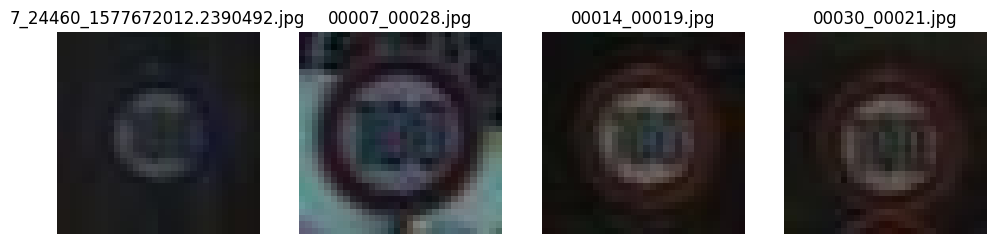

In [33]:
def display_sample_images_cv(base_path, num_samples=4):
    file_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(base_path) for f in filenames if f.endswith('.jpg')]
    plt.figure(figsize=(12, 3))
    for i, file in enumerate(file_paths[:num_samples]):
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(file.split('/')[-1])
        plt.axis('off')
    plt.show()

display_sample_images_cv(dir, num_samples=4)

File Name: /kaggle/input/traffic/myData/7/7_24460_1577672012.2390492.jpg
File Name: /kaggle/input/traffic/myData/7/00007_00028.jpg


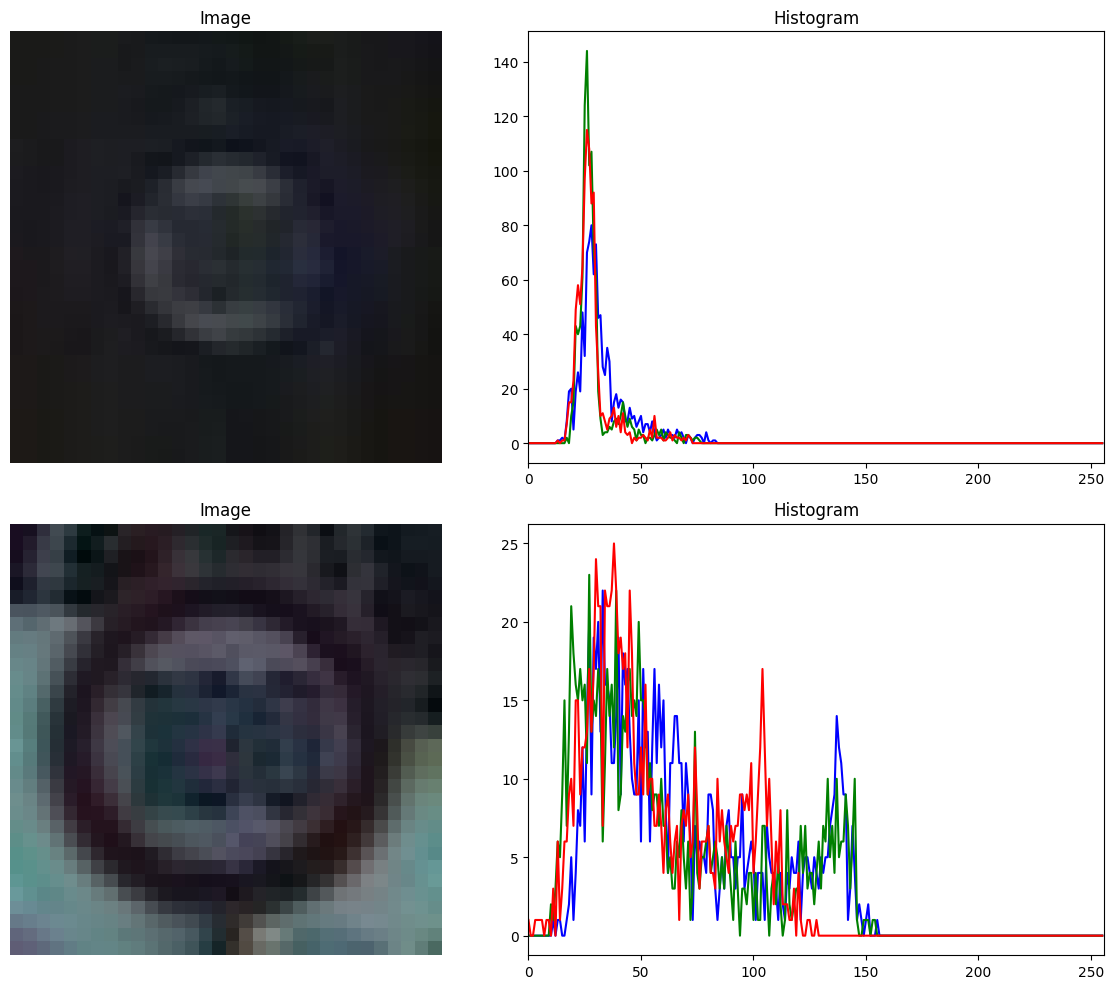

In [34]:
def display_image_histograms(base_path, num_samples=2):
    file_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(base_path) for f in filenames if f.endswith('.jpg')]
    #print(file_paths)
    plt.figure(figsize=(12, 5 * num_samples))
    
    for i, file in enumerate(file_paths[:num_samples]):
        print("File Name:",file)
        img = cv2.imread(file)
        colors = ('b', 'g', 'r')
        
        plt.subplot(num_samples, 2, 2*i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Image')
        plt.axis('off')
        
        plt.subplot(num_samples, 2, 2*i+2)
        for j, color in enumerate(colors):
            hist = cv2.calcHist([img], [j], None, [256], [0, 256])
            plt.plot(hist, color=color)
            plt.xlim([0, 256])
        plt.title('Histogram')
    
    plt.tight_layout()
    plt.show()

display_image_histograms(dir, num_samples=2)


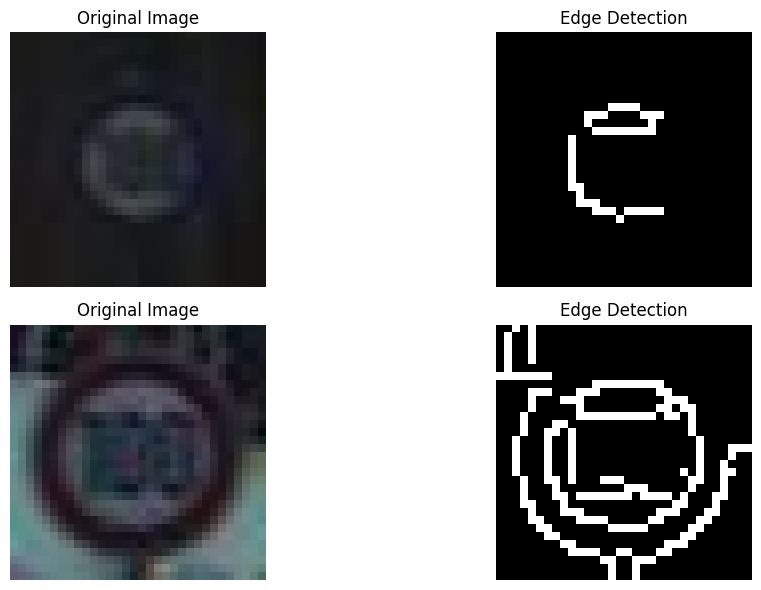

In [35]:
def display_edge_detection(base_path, num_samples=2):
    file_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(base_path) for f in filenames if f.endswith('.jpg')]
    plt.figure(figsize=(12, 3 * num_samples))
    
    for i, file in enumerate(file_paths[:num_samples]):
        img = cv2.imread(file)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray_img, 100, 200)

        plt.subplot(num_samples, 2, 2*i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(num_samples, 2, 2*i+2)
        plt.imshow(edges, cmap='gray')
        plt.title('Edge Detection')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

display_edge_detection(dir, num_samples=2)

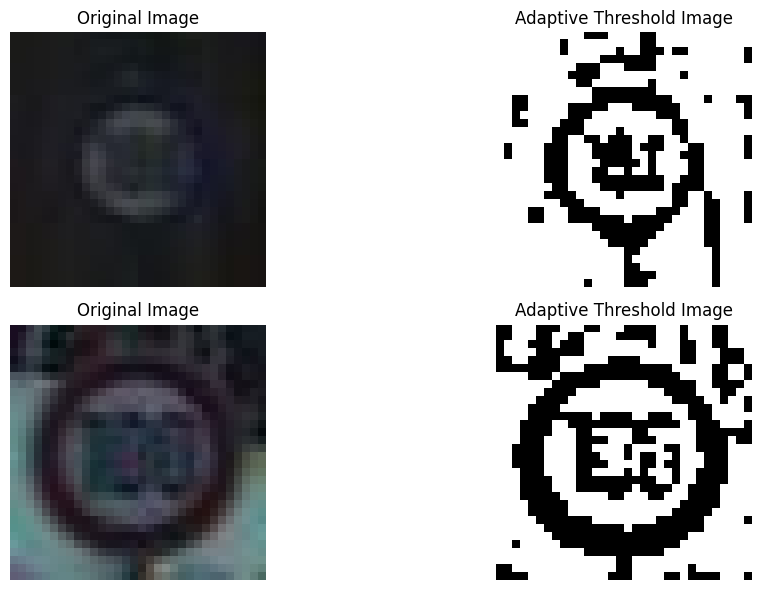

In [36]:
def display_threshold_images(base_path, num_samples=2):
    file_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(base_path) for f in filenames if f.endswith('.jpg')]
    plt.figure(figsize=(12, 3 * num_samples))
    
    for i, file in enumerate(file_paths[:num_samples]):
        img = cv2.imread(file)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2) # Sajib BHaia

        plt.subplot(num_samples, 2, 2*i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(num_samples, 2, 2*i+2)
        plt.imshow(adaptive_thresh, cmap='gray')
        plt.title('Adaptive Threshold Image')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

display_threshold_images(dir, num_samples=2)


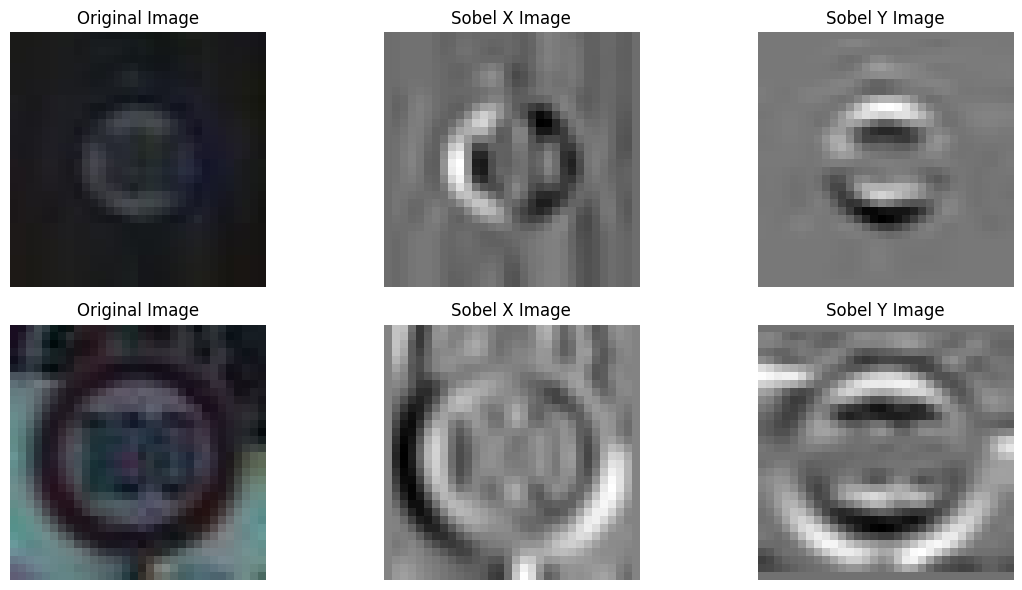

In [37]:

def display_sobel_edge_images(base_path, num_samples=2):
    file_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(base_path) for f in filenames if f.endswith('.jpg')]
    plt.figure(figsize=(12, 3 * num_samples))
    
    for i, file in enumerate(file_paths[:num_samples]):
        img = cv2.imread(file)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)  # Sobel Edge Detection on the X axis # Mahmudul BHaia
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)  # Sobel Edge Detection on the Y axis

        plt.subplot(num_samples, 3, 3*i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(num_samples, 3, 3*i+2)
        plt.imshow(sobelx, cmap='gray')
        plt.title('Sobel X Image')
        plt.axis('off')

        plt.subplot(num_samples, 3, 3*i+3)
        plt.imshow(sobely, cmap='gray')
        plt.title('Sobel Y Image')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

display_sobel_edge_images(dir, num_samples=2)


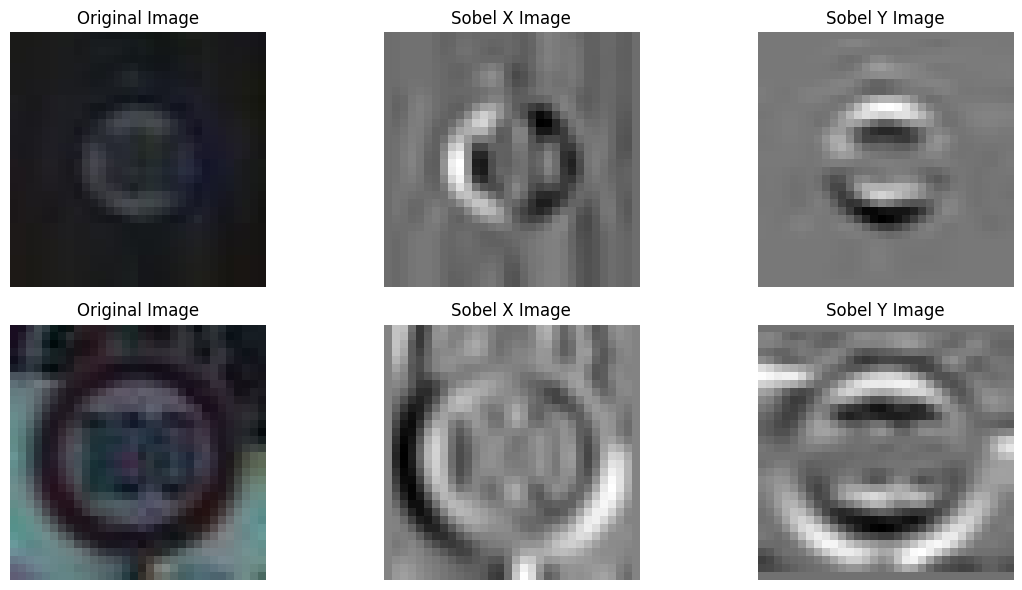

In [38]:
def display_sobel_edge_images(base_path, num_samples=2):
    file_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(base_path) for f in filenames if f.endswith('.jpg')]
    plt.figure(figsize=(12, 3 * num_samples))
    
    for i, file in enumerate(file_paths[:num_samples]):
        img = cv2.imread(file)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)  # Sobel Edge Detection on the X axis
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)  # Sobel Edge Detection on the Y axis

        plt.subplot(num_samples, 3, 3*i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(num_samples, 3, 3*i+2)
        plt.imshow(sobelx, cmap='gray')
        plt.title('Sobel X Image')
        plt.axis('off')

        plt.subplot(num_samples, 3, 3*i+3)
        plt.imshow(sobely, cmap='gray')
        plt.title('Sobel Y Image')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

display_sobel_edge_images(dir, num_samples=2)

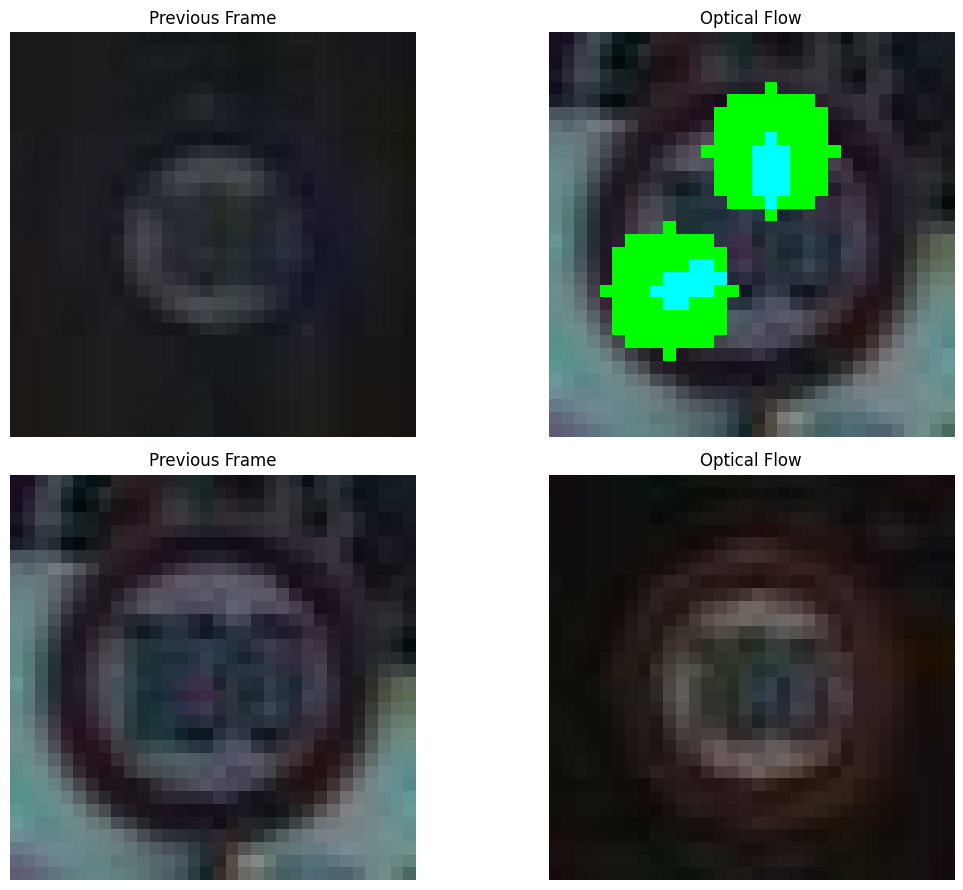

In [39]:
def display_optical_flow_images_corrected(base_path, num_samples=2):
    file_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(base_path) for f in filenames if f.endswith('.jpg')]
    plt.figure(figsize=(12, 3 * num_samples))
    
    lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    for i in range(num_samples - 1):
        old_frame = cv2.imread(file_paths[i])
        frame = cv2.imread(file_paths[i + 1])
        mask = np.zeros_like(old_frame)

        old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        p0 = cv2.goodFeaturesToTrack(old_gray, maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
        if p0 is not None and len(p0) > 0:
            p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
            good_new = p1[st == 1]
            good_old = p0[st == 1]

            for new, old in zip(good_new, good_old):
                a, b = new.ravel()
                c, d = old.ravel()
                mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), (255, 0, 0), 2)
                frame = cv2.circle(frame, (int(a), int(b)), 5, (0, 255, 0), -1)

            img = cv2.add(frame, mask)

            plt.subplot(num_samples - 1, 2, 2*i+1)
            plt.imshow(cv2.cvtColor(old_frame, cv2.COLOR_BGR2RGB))
            plt.title('Previous Frame')
            plt.axis('off')

            plt.subplot(num_samples - 1, 2, 2*i+2) 
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title('Optical Flow')
            plt.axis('off')

    plt.tight_layout()
    plt.show()

display_optical_flow_images_corrected(dir, num_samples=3)


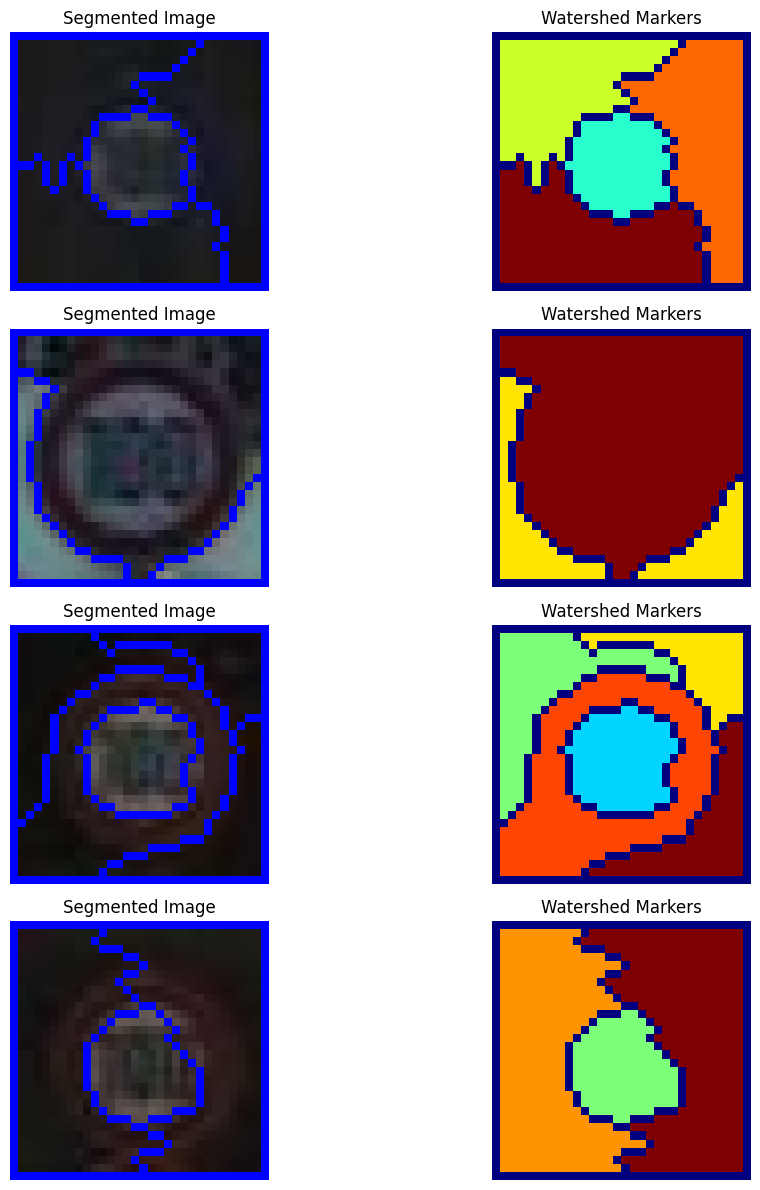

In [40]:
def display_watershed_segmentation(base_path, num_samples=2):
    file_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(base_path) for f in filenames if f.endswith('.jpg')]
    plt.figure(figsize=(12, 3 * num_samples))
    
    for i, file in enumerate(file_paths[:num_samples]):
        img = cv2.imread(file)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        kernel = np.ones((3,3),np.uint8)
        opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
        sure_bg = cv2.dilate(opening, kernel, iterations=3)


        dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
        ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)


        sure_fg = np.uint8(sure_fg)
        unknown = cv2.subtract(sure_bg, sure_fg)

        ret, markers = cv2.connectedComponents(sure_fg)
        
        markers = markers+1
        
        markers[unknown == 255] = 0

        markers = cv2.watershed(img, markers)
        img[markers == -1] = [255, 0, 0]  # Marking boundary in red

        plt.subplot(num_samples, 2, 2*i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Segmented Image')
        plt.axis('off')

        plt.subplot(num_samples, 2, 2*i+2)
        plt.imshow(markers, cmap='jet')  # Visualize the marker image
        plt.title('Watershed Markers')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

display_watershed_segmentation(dir, num_samples=4)

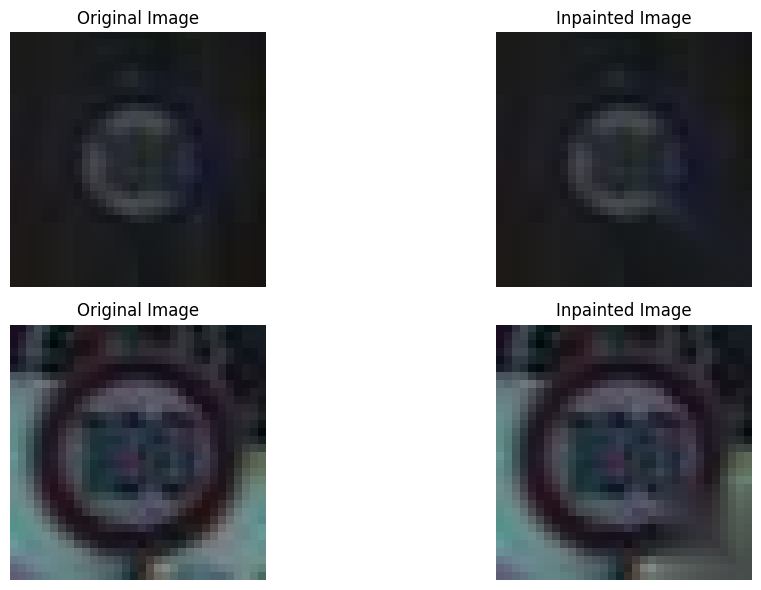

In [41]:

def display_image_inpainting(base_path, num_samples=2):
    file_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(base_path) for f in filenames if f.endswith('.jpg')]
    plt.figure(figsize=(12, 3 * num_samples))
    
    for i, file in enumerate(file_paths[:num_samples]):
        img = cv2.imread(file)
        mask = np.zeros(img.shape[:2], np.uint8)

        mask[20:120, 20:120] = 1

        inpainted = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)

        plt.subplot(num_samples, 2, 2*i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(num_samples, 2, 2*i+2)
        plt.imshow(cv2.cvtColor(inpainted, cv2.COLOR_BGR2RGB))
        plt.title('Inpainted Image')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

display_image_inpainting(dir, num_samples=2)

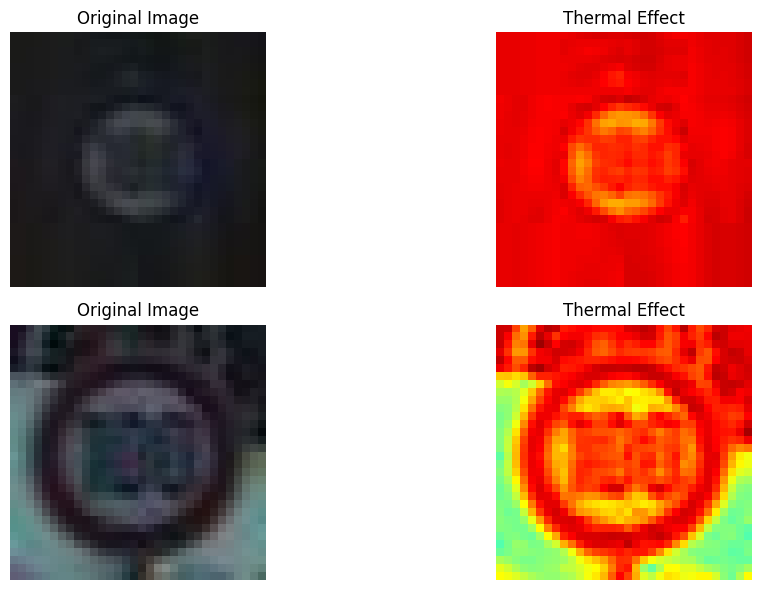

In [42]:
def display_thermal_effect(base_path, num_samples=2):
    file_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(base_path) for f in filenames if f.endswith('.jpg')]
    plt.figure(figsize=(12, 3 * num_samples))
    
    for i, file in enumerate(file_paths[:num_samples]):
        img = cv2.imread(file)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Applying a thermal effect using pseudocolor
        thermal = cv2.applyColorMap(gray, cv2.COLORMAP_JET)

        plt.subplot(num_samples, 2, 2*i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(num_samples, 2, 2*i+2)
        plt.imshow(thermal)
        plt.title('Thermal Effect')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

display_thermal_effect(dir, num_samples=2)


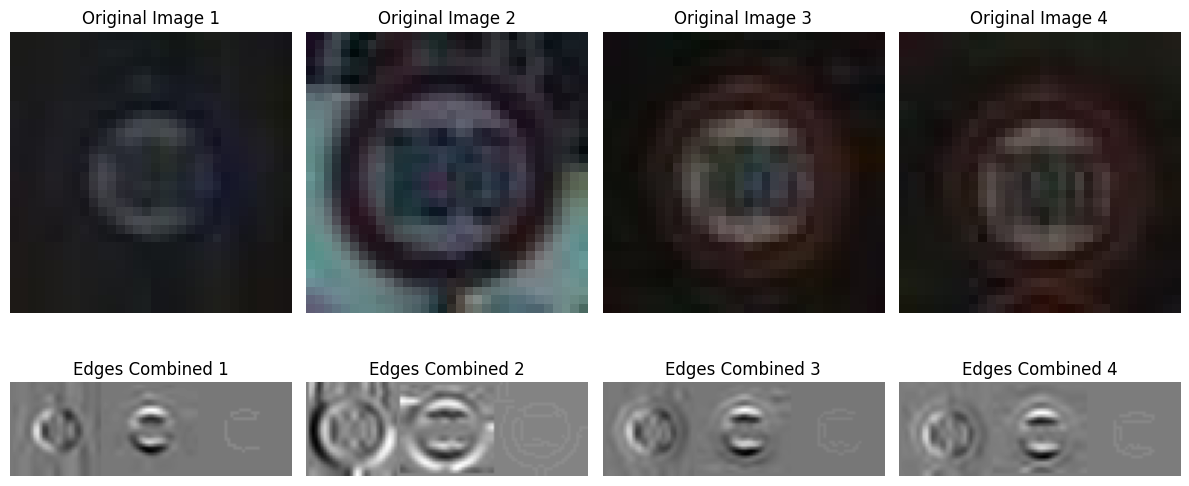

In [43]:
def display_edge_collage(base_path, num_samples=4):
    file_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(base_path) for f in filenames if f.endswith('.jpg')]
    plt.figure(figsize=(12, 6))  # Larger figure size to accommodate more images
    
    for i, file in enumerate(file_paths[:num_samples]):
        img = cv2.imread(file)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)

        edges = cv2.Canny(gray, 100, 200)

        combined = np.hstack((sobelx, sobely, edges))

        plt.subplot(2, num_samples, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'Original Image {i+1}')
        plt.axis('off')

        plt.subplot(2, num_samples, i + num_samples + 1)
        plt.imshow(combined, cmap='gray')
        plt.title(f'Edges Combined {i+1}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

display_edge_collage(dir, num_samples=4)


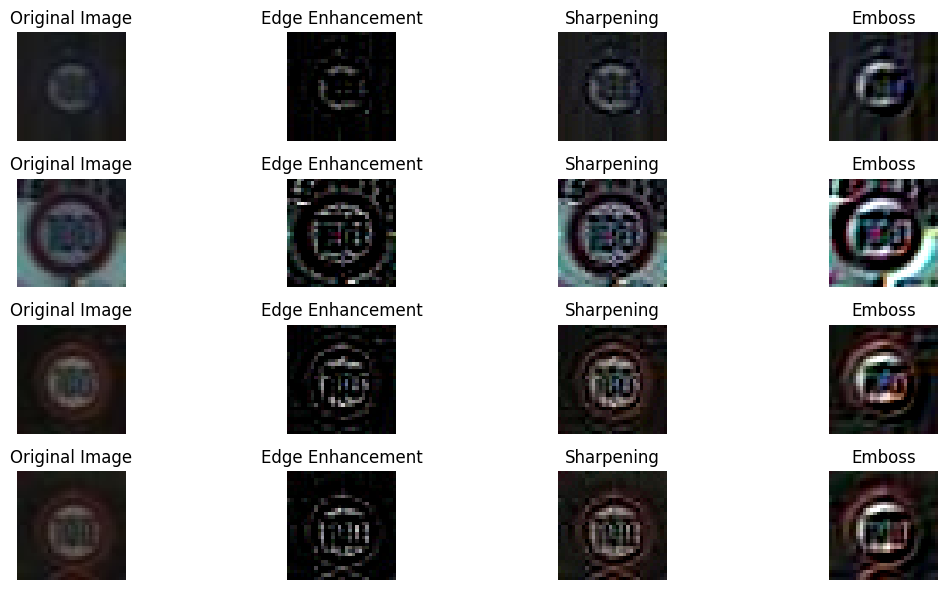

In [44]:
def display_custom_convolution(base_path, num_samples=4):
    file_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(base_path) for f in filenames if f.endswith('.jpg')]
    plt.figure(figsize=(12, 6))  # Adjusted figure size for more images and clearer display

    edge_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype=np.float32)  # Edge enhancement
    sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)  # Sharpening
    emboss_kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]], dtype=np.float32)  # Emboss

    for i, file in enumerate(file_paths[:num_samples]):
        img = cv2.imread(file)

        # Apply custom convolution kernels
        edge_enhanced = cv2.filter2D(img, -1, edge_kernel)
        sharpened = cv2.filter2D(img, -1, sharpen_kernel)
        embossed = cv2.filter2D(img, -1, emboss_kernel)

        plt.subplot(num_samples, 4, 4*i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(num_samples, 4, 4*i+2)
        plt.imshow(cv2.cvtColor(edge_enhanced, cv2.COLOR_BGR2RGB))
        plt.title('Edge Enhancement')
        plt.axis('off')

        plt.subplot(num_samples, 4, 4*i+3)
        plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
        plt.title('Sharpening')
        plt.axis('off')

        plt.subplot(num_samples, 4, 4*i+4)
        plt.imshow(cv2.cvtColor(embossed, cv2.COLOR_BGR2RGB))
        plt.title('Emboss')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

display_custom_convolution(dir, num_samples=4)


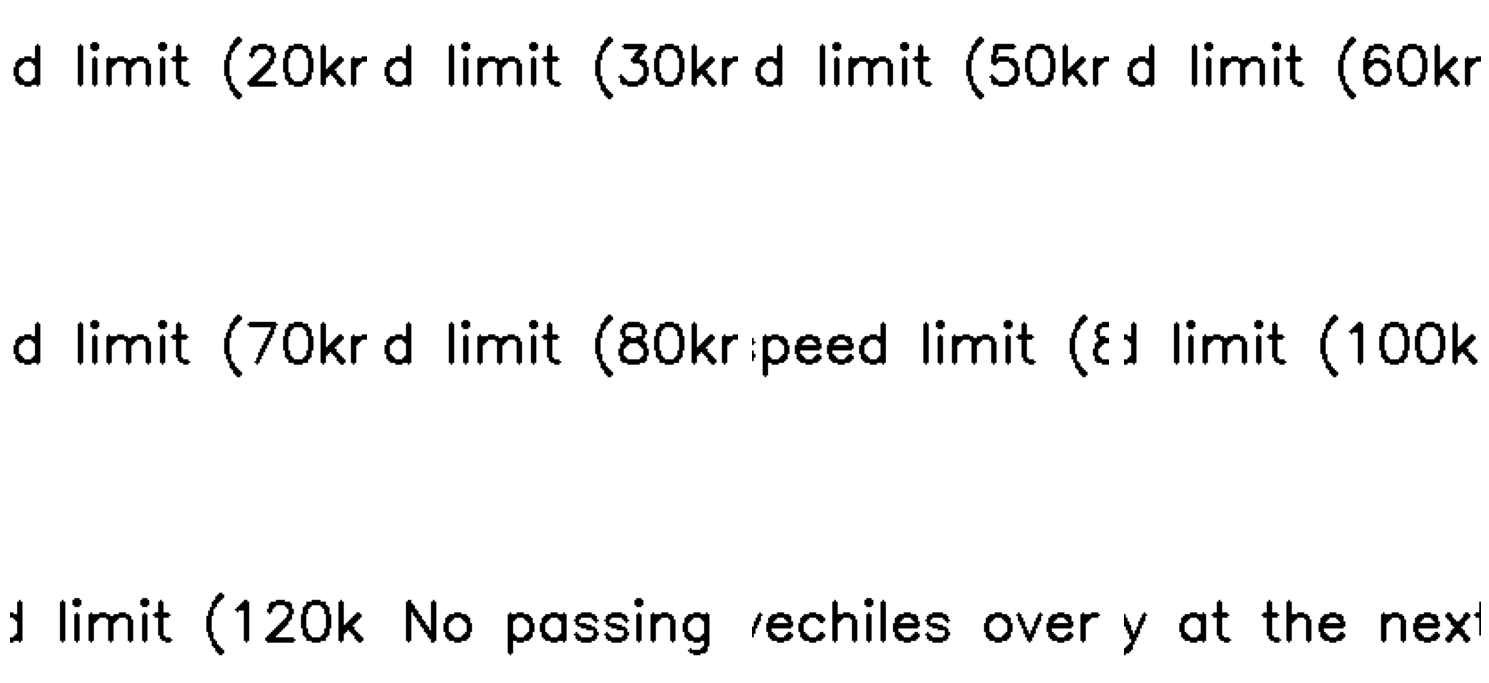

In [45]:
labels_data = pd.read_csv('/kaggle/input/traffic/labels.csv')

def create_label_image(text, width=200, height=60, font_scale=1, thickness=2):
    image = np.ones((height, width, 3), dtype="uint8") * 255  # white background
    font = cv2.FONT_HERSHEY_SIMPLEX
    (text_width, text_height), _ = cv2.getTextSize(text, font, font_scale, thickness)
    text_offset_x = (width - text_width) // 2
    text_offset_y = (height + text_height) // 2
    cv2.putText(image, text, (text_offset_x, text_offset_y), font, font_scale, (0, 0, 0), thickness)
    return image

label_images = [create_label_image(row['Name']) for _, row in labels_data.iterrows()]


fig, axs = plt.subplots(3, 4, figsize=(15, 10))
for ax, img in zip(axs.flat, label_images):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [46]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def load_data(data_directory, target_size=(64, 64)):
    images = []
    labels = []
    
    for label in os.listdir(data_directory):
        label_path = os.path.join(data_directory, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.resize(image, target_size)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
                    images.append(image)
                    labels.append(int(label))
    
    images = np.array(images, dtype='float32')
    labels = np.array(labels, dtype='int32')
    
    # Normalize the image data to 0-1
    images /= 255.0
    
    # Split into training and test sets
    train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
    
    # Convert labels to one-hot encoding
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)
    
    return (train_images, train_labels), (test_images, test_labels)


data_directory = '/kaggle/input/traffic/myData'  
(train_images, train_labels), (test_images, test_labels) = load_data(data_directory)

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


input_shape = (64, 64, 3)  
num_classes = 43  

model = create_model(input_shape, num_classes)
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 649,003 (2.48 MB)

 Trainable params: 649,003 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

In [49]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.3638 - loss: 2.3697 - val_accuracy: 0.8734 - val_loss: 0.5420
Epoch 2/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6452 - loss: 1.2418 - val_accuracy: 0.9063 - val_loss: 4.0526
Epoch 3/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7111 - loss: 1.0543 - val_accuracy: 0.9451 - val_loss: 3.7450
Epoch 4/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7838 - loss: 0.7578 - val_accuracy: 0.9561 - val_loss: 1.2696
Epoch 5/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8350 - loss: 0.5824 - val_accuracy: 0.9651 - val_loss: 2.9624
Epoch 6/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7628 - loss: 0.9525 - val_accuracy: 0.9601 - val_loss: 1.9566
Epoch 7/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8775 - loss: 0.3808 - val_accuracy: 0.9715 - val_loss: 0.6789
Epoch 8/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8893 - loss: 0.3523 -

In [50]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9802 - loss: 0.0936
Test Accuracy: 0.9799


W0000 00:00:1715516653.293932     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


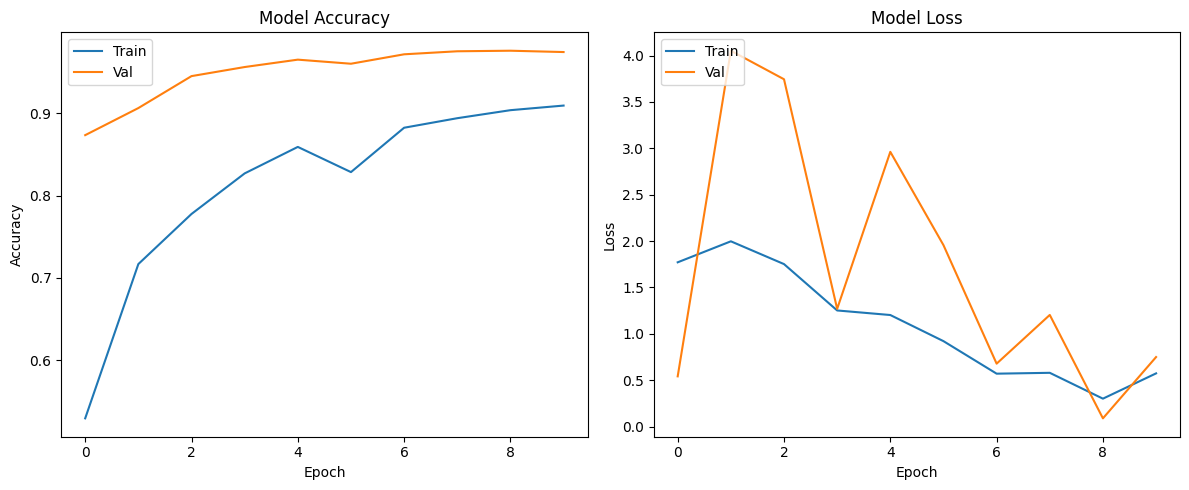

In [51]:
import matplotlib.pyplot as plt

# Check if 'history' has been defined
if 'history' in globals():
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.tight_layout()
    plt.show()
else:
    print("The training history is not available. Please train your model with 'history = model.fit(...)' and make sure 'history' is accessible.")


In [52]:
class_names = list(labels_data['Name'])

458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


W0000 00:00:1715516657.007870     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


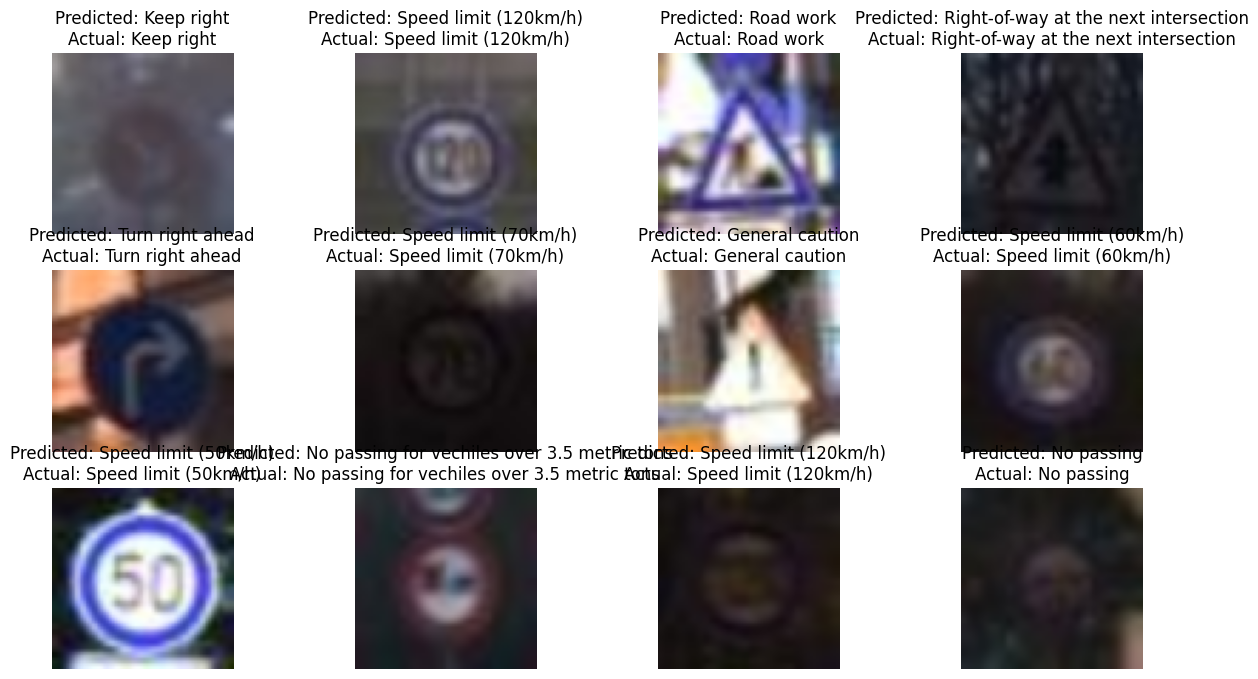

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def plot_images(images, actual_labels, predicted_labels, class_names):
    n = 12  
    indexes = np.random.choice(len(images), n, replace=False)
    
    plt.figure(figsize=(15, 8))
    for i, index in enumerate(indexes):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[index])
        plt.title(f"Predicted: {class_names[predicted_labels[index]]}\nActual: {class_names[actual_labels[index]]}")
        plt.axis("off")

#class_names = ['Speed Limit', 'Yield', 'Stop', 'No Entry', 'Traffic Signal', 'Pedestrian', 'Children Crossing', 'Cycle Path', 'Animal Crossing', 'No Parking']

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


actual_labels = np.argmax(test_labels, axis=1) if test_labels.ndim > 1 else test_labels

plot_images(test_images, actual_labels, predicted_labels, class_names)


In [54]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

base_model.trainable = False

inputs = tf.keras.Input(shape=(64, 64, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(43, activation='softmax')(x)  # Assuming 43 classes for traffic signs

model = Model(inputs, outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/tmp/ipykernel_34/621536088.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,596,971 (9.91 MB)

 Trainable params: 338,987 (1.29 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [55]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.4256 - loss: 2.0205 - val_accuracy: 0.6914 - val_loss: 0.9633
Epoch 2/10
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6622 - loss: 1.0463 - val_accuracy: 0.7617 - val_loss: 0.7422
Epoch 3/10
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7218 - loss: 0.8529 - val_accuracy: 0.7896 - val_loss: 0.6569
Epoch 4/10
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7524 - loss: 0.7443 - val_accuracy: 0.8095 - val_loss: 0.5878
Epoch 5/10
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7774 - loss: 0.6679 - val_accuracy: 0.8253 - val_loss: 0.5473
Epoch 6/10
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7904 - loss: 0.6164 - val_accuracy: 0.8285 - val_loss: 0.5268
Epoch 7/10
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8089 - loss: 0.5679 - val_accuracy: 0.8396 - val_loss: 0.5062
Epoch 8/10
1829/1829 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8194 - loss: 

458/458 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step


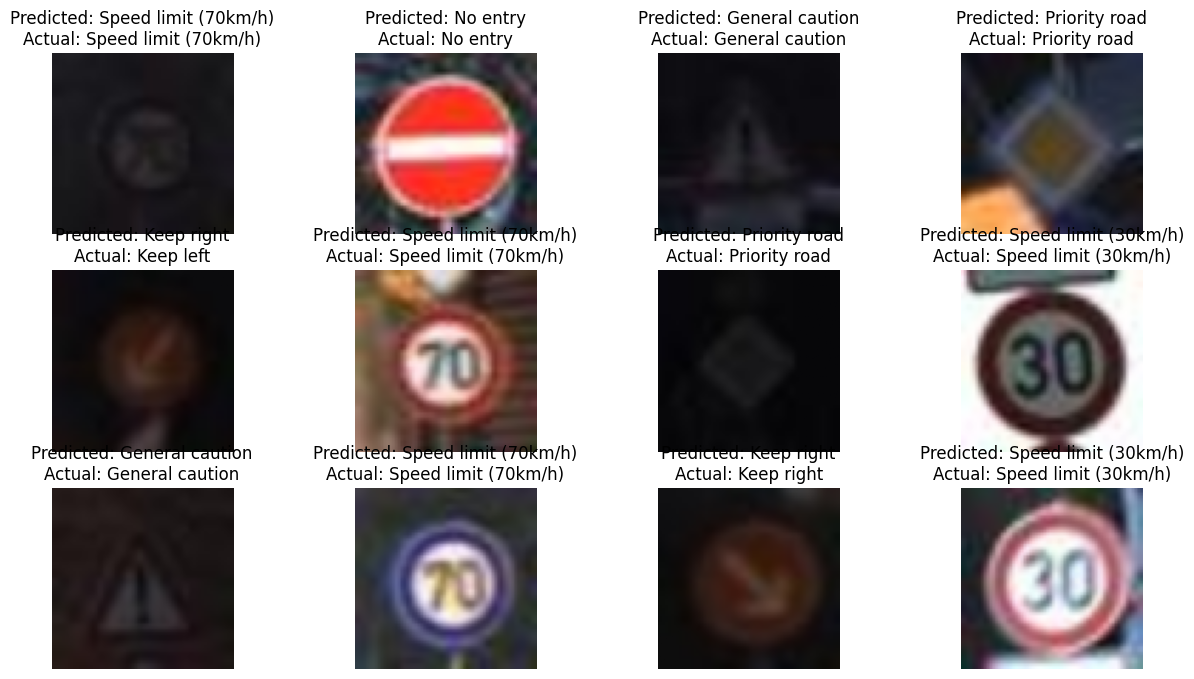

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def plot_images(images, actual_labels, predicted_labels, class_names):
    n = 12  
    indexes = np.random.choice(len(images), n, replace=False)
    
    plt.figure(figsize=(15, 8))
    for i, index in enumerate(indexes):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[index])
        plt.title(f"Predicted: {class_names[predicted_labels[index]]}\nActual: {class_names[actual_labels[index]]}")
        plt.axis("off")

#class_names = ['Speed Limit', 'Yield', 'Stop', 'No Entry', 'Traffic Signal', 'Pedestrian', 'Children Crossing', 'Cycle Path', 'Animal Crossing', 'No Parking']

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


actual_labels = np.argmax(test_labels, axis=1) if test_labels.ndim > 1 else test_labels

plot_images(test_images, actual_labels, predicted_labels, class_names)
